<font color='red'>Review</font>
- Do sprawdzenia. Czy atrybut `fitness` klasyfikatora nie powinien rosnąć razem z `prediction`?
> Rośnie na podstawie błędu (odwrotnie proporcjonalnie), który jest na podstawie prediction. Usunąłem ten cell przy tym jak dodałem avg experiment.
- Ostatni wykres nie ma sensu. Jak algorytm uruchamiany jest przez `explore` to liczba kroków nie będzie optymalna w większości przypadków. Trzeba by dać albo `explore_exploit` albo samo `exploit` (jako drugą metodę) i narysować liczbę kroków dla tej właśnie fazy
>Zamieniłem wszyskie wykresy na tak jak są w An Analysis of Generalization in the XCS
Classifier System. Czyli 4000 trials explore bias (z epsilon 0.5) oraz ostatnie 1000 trials exploit.
- Czy metryka `knowledge` której używasz jest gdzieś opisana w literaturze? Wypada tu dosyć słabo
>Cały czas szukam czegoś podobnego, nie ma podpadcia w literaturze i ją usunąłem. 

### XCS in Maze 5
This experiment is meant to replicate An Analysis of Generalization in the XCS Classifier System Maze5 experiment. 
Due to differences in implementation I decided to run this experiment with my default values in hopes of that it will yield similar results this way. 

In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

from lcs.agents.xcs import XCS, Configuration
from utils.xcs_utils import *

In [2]:
maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'tuple'>
('0', '0', '0', '1', '0', '0', '1', '0')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ A □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    metrics_trial_frequency=100,
                    user_metrics_collector_fcn=xcs_metrics)

explore_trials = 4000

df = avg_experiment(maze,
                    cfg,
                    number_of_tests=5,
                    explore_trials=4000,
                    exploit_metrics=1000)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [1.8367040323296963e-40, 3.384414254936362e-40, 4.552186559101643e-40, 1.789576234379798e-40, 3.804899378693704e-40, 2.1268098220226902e-40, 2.9914837333189756e-40, 2.0912058520556257e-40], 'perf_time': 0.009908499999999876, 'population': 34, 'numerosity': 50}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [18.44659662660377, 21.922370655154825, 26.355011076274813, 26.03019504282941, 23.80612607373458, 20.575337554023502, 24.217199385959326, 20.211300630531554], 'perf_time': 0.008266200000000445, 'population': 36, 'numerosity': 80}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [32.70789035569854, 57.725154849238166, 54.13589760597331, 47.91988344945945, 33.27917843017319, 49.54673627161176, 73.20470335153394, 42.688463518017784], 'perf_time': 0.008434300000001116, 'population': 36, 'numerosity': 82}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [45.36825563932645, 40.04067984960161, 50.99519463422322, 72.76153321963095, 36.402327031467, 53.923952955932066, 39.263101875973554, 47.37794207188473], 'perf_time': 0.008360000000001477, 'population': 36, 'numerosity': 82}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [8.011934974324824, 11.636016707621721, 

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [18.21258073570813, 15.425924546751876, 26.618717781704532, 17.346097679280586, 28.97456276610836, 11.209827139807066, 4.735235432430815, 5.921030509570703], 'perf_time': 0.010086200000003487, 'population': 49, 'numerosity': 90}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [40.07358464239371, 41.02933970113817, 70.33555073782604, 33.55613538272411, 40.32205876553868, 37.247279568075804, 44.38322143741145, 33.75656126530891], 'perf_time': 0.009789000000004933, 'population': 50, 'numerosity': 96}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [42.58520593354137, 47.67940786260453, 68.13587236900025, 38.297106238579566, 48.90914468708906, 48.47254161759419, 47.794671874481494, 49.61059620608141], 'perf_time': 0.01012049999999931, 'population': 50, 'numerosity': 98}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [45.888834907597584, 54.798199382838426, 

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [27.93170469407693, 30.098763090065145, 30.598360961070906, 22.418473707081045, 34.15226080203816, 27.258476983451924, 25.71807883913132, 30.598321003109678], 'perf_time': 0.009585199999989413, 'population': 46, 'numerosity': 86}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 1, 'reward': [33.028461379631615, 40.409772938320316, 153.00052421231987, 43.88106265927815, 34.365920507152474, 36.26064999543745, 41.64411640415764, 40.28977086677848], 'perf_time': 0.0002419000000060123, 'population': 46, 'numerosity': 90}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [69.7930402547645, 65.41084744997603, 81.15269960072949, 58.11006311586476, 47.218665185707174, 56.61135097326638, 80.19896127174145, 103.56743095623735], 'perf_time': 0.009353599999997186, 'population': 47, 'numerosity': 99}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [42.204090729949236, 64.2897823403917

Executing 3 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [44.354996430351484, 33.691329066740636, 40.89279853001281, 33.66483223235095, 53.0993392801092, 29.39943764100788, 41.16509091826687, 32.34318427464096], 'perf_time': 0.010319799999990664, 'population': 37, 'numerosity': 75}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [73.08909140530487, 45.25642175617651, 151.94391744493998, 40.863270267766026, 69.81907824732527, 44.70039962830063, 51.621323785956974, 49.7971261026176], 'perf_time': 0.0101003999999989, 'population': 37, 'numerosity': 79}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 3, 'reward': [33.653586283972686, 26.592339768621663, 135.35319459987954, 12.63107780360555, 45.50842387522392, 15.066284657076304, 16.909022731239357, 24.069526584460444], 'perf_time': 0.0005960999999956584, 'population': 37, 'numerosity': 81}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [47.954184718619025, 35.68192421534036, 

Executing 4 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [26.052035244126568, 22.547305266978608, 19.464919491144094, 29.010658941319626, 17.32752858837215, 52.21135598987859, 25.216639865253022, 26.017843421631838], 'perf_time': 0.009100300000000061, 'population': 44, 'numerosity': 87}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 50, 'reward': [32.436005482207314, 41.55415104186359, 42.747527903865205, 48.5533803280331, 28.449563893494602, 37.613960802184884, 35.88338088879685, 36.057873295182695], 'perf_time': 0.01037560000000326, 'population': 44, 'numerosity': 91}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [53.985546783042764, 37.21579698619005, 51.23468844821517, 50.81131855810478, 45.70603442703781, 48.714139220382975, 33.86852857166219, 36.57156879468384], 'perf_time': 0.009381799999999885, 'population': 44, 'numerosity': 95}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [32.46468356610965, 24.8084607472314

In [4]:
display(df)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,48.2,0.008386,31.0,43.2
100,40.2,0.008161,42.4,73.2
200,43.2,0.008622,42.4,77.6
300,50.0,0.010070,42.4,80.8
400,50.0,0.009472,42.4,83.6
500,50.0,0.009789,42.4,85.2
600,40.2,0.007974,42.6,86.0
700,42.0,0.008287,42.6,86.4
800,40.2,0.007788,42.6,87.6


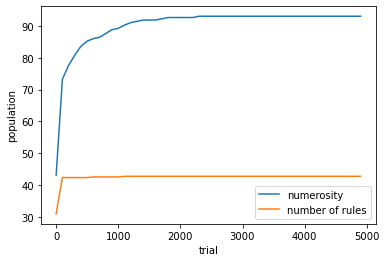

In [5]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

plt.show()

It is hard to say but oking at amount of times algorithm reaches top steps (50) the steps might actually go down over trials.  need to somehow smooth it to see it better

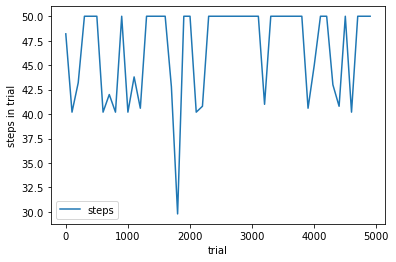

In [6]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])

### Conclusion
The results of my implementation of the XCS aredifferent compared to An Analysis of Generalization in the XCS
Classifier System. 
Unfortunately from 10 experiments my algorithm managed to fail to solve the maze as well as the one presented in An Analysis of Generalization in the XCS Classifier System. With exploitation not really going down below 50 steps, where it should be easily below 50.
It can be caused by differences in implementation or envirement I am unaware of.
<br />
Unfortunately I cannot find metrics or issues that could showcase what causes what said diffrences are.